In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

# Now that you have the dataset loaded you can use the commands below

In [24]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


to see that there are 1797 images and 1797 labels in the dataset

# Showing the Images and the Labels (Digits Dataset)

This section is really just to show what the images and labels look like. It usually helps to visualize your data to see what you are working with.

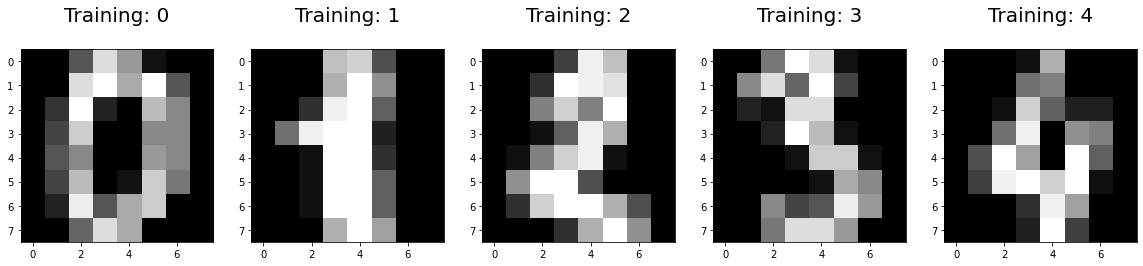

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Splitting Data into Training and Test Sets (Digits Dataset)

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

## Step 1. Import the model you want to use

### In sklearn, all machine learning models are implemented as Python classes

In [28]:
from sklearn.linear_model import LogisticRegression

## Step 2. Make an instance of the Model

In [29]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

## Step 3. Training the model on the data, storing the information learned from the data
### Model is learning the relationship between digits (x_train) and labels (y_train)

In [30]:
logisticRegr.fit(x_train, y_train)

C:\Users\soura\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 4. Predict labels for new data (new images)

### Uses the information the model learned during the model training process

In [31]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

Predict for Multiple Observations (images) at Once

In [37]:
predictions = logisticRegr.predict(x_test)

# Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [38]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)p

0.9511111111111111


Our accuracy was 95.3%.
# Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn) for making confusion matrices more understandable and visually appealing.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [40]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


## As you can see below, this method produces a more understandable and visually readable confusion matrix using seaborn.

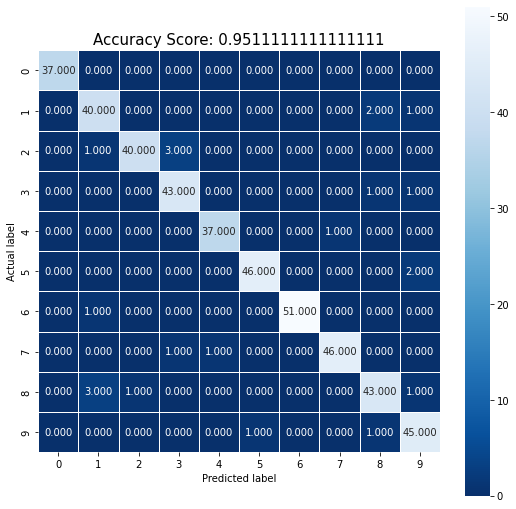

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);